# Numeričko računanje svojstvenih vrijednosti i svojstvenih funkcija Dirichletovog Laplaciana metodom konačnih razlika


Ova bilježnica služi za demonstraciju implementacije numeričkog računanja Dirichletovog Laplaciana metodom konačnih razlika koristeći funkcije za linearnu algebru iz biblioteke *SciPy* paketa.


In [1]:
import copy
import math
import numbers

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D


In [2]:
%matplotlib inline


In [3]:
sym.init_printing()


Funkcije su implementirane u datoteci *script.py*.


In [4]:
from script import *


Domenu (otvoreni ograničeni skup) prikazujemo logičkom matricom (elementi su joj $ 0 $ i $ 1 $ odnosno `True` i `False`) koja predstavlja diskretizaciju pravokutnika čije zatvorenje sadrži zatvorenje domene. Na mjestu $ \left( i , j \right) $ nalazi se $ 1 $ ako i samo ako ta točka pripada domeni.

U skripti *script* definirane su funkcije `triang` za konstrukciju trokutaste domene i `ellips` za konstrukciju eliptične domene. Poziv bez parametara ili s jednim parametrom nenegativnim realnim brojem konstruira jednakostranični trokut odnosno krug &mdash; varijablom `w` zadat ćemo duljinu stranice trokuta odnosno dijametar kruga. Zadajemo parametar `num` varijablom `n` koji definira *finoću* diskretizacije (veća stranica pravokutnika bit će diskretizirana na `num` točaka, a manja na razmjerno manje točaka).


In [5]:
w = 1.0


In [6]:
n = 50


In [7]:
O, dom = triang(w, num = n, return_dom = True)
#O, dom = ellips(0.5 * w, num = n, return_dom = True)


Proučimo veličinu dobivene matrice `O`.


In [8]:
O.shape


Prikažimo matricu `O` na grafu. Ispisujemo prvo granice pravokutnika (`dom`) iako bismo njih trebali moći aproksimativno iščitati i iz samog grafa. Nadalje, što se tiče samog grafa, u skripti *script* definirana je funkcija `show_2d_func` koja olakšava prikaz realnih funkcija na dvodimenzionalnoj domeni reprezentiranih diskretizirajućom matricom. Domena se može zadati argumentom `dom`, a tip grafa argumentom `how`.


In [9]:
dom


array([[-0.5 ,  0.5 ],
       [-0.44,  0.44]])

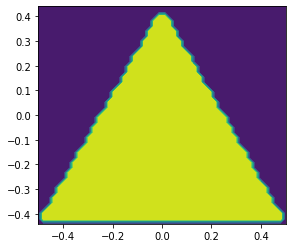

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_aspect('equal')

show_2d_func(O, dom = dom, ax = ax, how = 'contourf')

plt.show()


Izračunajmo `k` najmanjih svojstvenih vrijednosti i pripadnih svojstvenih funkcija Dirichletovog Laplaciana na skupu *definiranom* matricom `O` (skup zapravo nije definiran tom matricom, ali ta matrica daje prikaz nekih njegovih točaka, po mogućnosti dovoljno mnogo). Svojstvene vrijednosti i pripadne svojstvene funkcije računamo funkcijom `eigenfunc` definiranom u skripti *script* kojoj, ovisno o resursima i veličini matrice `O`, možemo zadati da se račun izvodi koristeći `numpy.linalg` ili `scipy.sparse.linalg`.


In [11]:
k = 100


In [12]:
l, u = eigenfunc(
    O,
    k,
    as_sparse = False,
    h = np.mean((dom[:, 1] - dom[:, 0]) / list(O.shape))
)


In [13]:
if isinstance(l, float) and u.ndim == 2:
    l = np.array([l], dtype = float, order = 'F')
    u = u.reshape((1, u.shape[0], u.shape[1])).copy(order = 'F')


Promotrimo izračunate svojstvene vrijednosti.


In [14]:
l.size


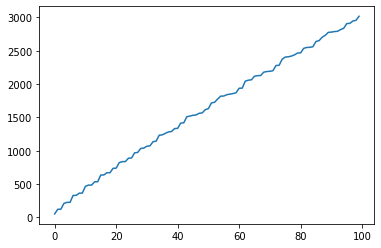

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.plot(l)

plt.show()


Proučimo i prvu svojstvenu funkciju,a  ispišimo pritom i pripadnu svojstvenu vrijednost skaliranu dijametrom domene (vrijednost varijable `w`). U tu svrhu ponovo koristimo funkciju `show_2d_func`.


In [16]:
i = 0


52.413437599727544


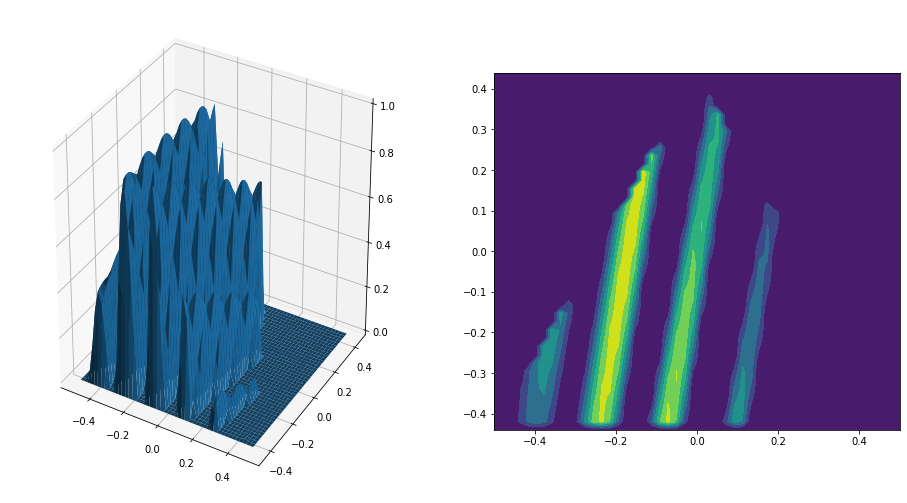

In [17]:
fig = plt.figure(figsize = (16, 9))

ax0 = fig.add_subplot(121, projection = '3d')
ax1 = fig.add_subplot(122)

ax1.set_aspect('equal')

show_2d_func(u[i], dom = dom, ax = ax0, how = 'plot_surface')
show_2d_func(u[i], dom = dom, ax = ax1, how = 'contourf')

print(l[i] / w)

plt.show()
